# Online Retail Decommendation System.

### Item to Item Product Recommendation System by Filtering

In [3]:
# Import necessary libraries.
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# Read data source CSV file.
df1 = pd.read_csv('OnlineRetail.csv')

In [5]:
# Check dataframe information.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Read header of dataframe.
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [7]:
# Check any column containing the null value.
df1.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [8]:
# Count the number of null value records in the CustomerID column.
df1['CustomerID'].isna().sum()

135080

In [9]:
df1a = df1.dropna(subset=['CustomerID'])

In [10]:
# Read header of dataframe.
df1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [11]:
# Read header of dataframe.
df1a.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [12]:
# Create CustomerID vs Item (Purchased Items, by StockCode) matrix by pivot table function.
CustomerID_Item_matrix = df1a.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [13]:
# Display the shape of matrix, 4372 rows of CustomerID, 3684 columns of Item.
CustomerID_Item_matrix.shape

(4372, 3684)

In [14]:
# Update illustration of the matrix, 1 to represent customer have purchased item, 0 to represent customer haven't purchased.
CustomerID_Item_matrix = (CustomerID_Item_matrix > 0).astype(int)

In [15]:
# Read header of CustomerID vs Item matrix.
CustomerID_Item_matrix.loc[12670:].head()

StockCode   10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
CustomerID                                                                     
12670.0         0      0      0       0       0       0      0      0      0   
12672.0         0      0      0       0       0       0      0      0      0   
12673.0         1      0      0       0       0       0      0      0      0   
12674.0         0      0      0       0       0       0      0      0      0   
12676.0         0      0      0       0       0       0      0      0      0   

StockCode   11001  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK  D  DOT  M  \
CustomerID         ...                                                      
12670.0         0  ...       0       0             0   0     0  0    0  0   
12672.0         0  ...       0       0             0   0     0  0    0  0   
12673.0         0  ...       0       0             0   0     0  0    0  0   
12674.0         0  ...       0       0             0   0     0  0    0  0   
12676.0         0  ...       0       0             0   0     0  0    0  0   

StockCode   PADS  POST  
CustomerID              
12670.0        0     1  
12672.0        0     0  
12673.0        0     1  
12674.0        0     1  
12676.0        0     1  

[5 rows x 3684 columns]

In [16]:
# Create Item to Item similarity matrix.
item_item_similarity_matrix = pd.DataFrame(
    cosine_similarity(CustomerID_Item_matrix.T)
)

In [17]:
# Display header of Item to Item similarity matrix. 
item_item_similarity_matrix.head()

0     1         2         3     4         5         6         7     \
0  1.000000   0.0  0.094868  0.091287   0.0  0.000000  0.090351  0.063246   
1  0.000000   1.0  0.000000  0.000000   0.0  0.000000  0.032774  0.045883   
2  0.094868   0.0  1.000000  0.115470   0.0  0.000000  0.057143  0.060000   
3  0.091287   0.0  0.115470  1.000000   0.0  0.000000  0.164957  0.000000   
4  0.000000   0.0  0.000000  0.000000   1.0  0.447214  0.063888  0.044721   

       8         9     ...  3674  3675  3676      3677  3678  3679  3680  \
0  0.098907  0.095346  ...   0.0   0.0   0.0  0.029361   0.0   0.0   0.0   
1  0.047836  0.000000  ...   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
2  0.041703  0.060302  ...   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
3  0.000000  0.000000  ...   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
4  0.000000  0.000000  ...   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   

       3681  3682      3683  
0  0.059423   0.0  0.070057  
1  0.017244   0.0  0.000000  
2  0.075165   0.0  0.000000  
3  0.000000   0.0  0.000000  
4  0.000000   0.0  0.000000  

[5 rows x 3684 columns]

In [18]:
# Update index to corresponding Item Code (StockCode).
item_item_similarity_matrix.columns = CustomerID_Item_matrix.T.index
item_item_similarity_matrix['StockCode'] = CustomerID_Item_matrix.T.index
item_item_similarity_matrix = item_item_similarity_matrix.set_index('StockCode')

In [19]:
# Display header of Item to Item similarity matrix. 
item_item_similarity_matrix.head()

StockCode     10002  10080     10120    10123C  10124A    10124G     10125  \
StockCode                                                                    
10002      1.000000    0.0  0.094868  0.091287     0.0  0.000000  0.090351   
10080      0.000000    1.0  0.000000  0.000000     0.0  0.000000  0.032774   
10120      0.094868    0.0  1.000000  0.115470     0.0  0.000000  0.057143   
10123C     0.091287    0.0  0.115470  1.000000     0.0  0.000000  0.164957   
10124A     0.000000    0.0  0.000000  0.000000     1.0  0.447214  0.063888   

StockCode     10133     10135     11001  ...  90214Y  90214Z  BANK CHARGES  \
StockCode                                ...                                 
10002      0.063246  0.098907  0.095346  ...     0.0     0.0           0.0   
10080      0.045883  0.047836  0.000000  ...     0.0     0.0           0.0   
10120      0.060000  0.041703  0.060302  ...     0.0     0.0           0.0   
10123C     0.000000  0.000000  0.000000  ...     0.0     0.0           0.0   
10124A     0.044721  0.000000  0.000000  ...     0.0     0.0           0.0   

StockCode        C2  CRUK    D  DOT         M  PADS      POST  
StockCode                                                      
10002      0.029361   0.0  0.0  0.0  0.059423   0.0  0.070057  
10080      0.000000   0.0  0.0  0.0  0.017244   0.0  0.000000  
10120      0.000000   0.0  0.0  0.0  0.075165   0.0  0.000000  
10123C     0.000000   0.0  0.0  0.0  0.000000   0.0  0.000000  
10124A     0.000000   0.0  0.0  0.0  0.000000   0.0  0.000000  

[5 rows x 3684 columns]

In [20]:
# Randomly pick StockCode (23150) to display the most similar StockCode.
top_10_similar_items = list(
    item_item_similarity_matrix
        .loc[str(23150)]  
        .sort_values(ascending=False)
        .iloc[:10]
        .index
)

In [21]:
# Display top 10 similar items of StockCode (23150).
top_10_similar_items

['23150',
 '23151',
 '23152',
 '23149',
 '23210',
 '23211',
 '23226',
 '22078',
 '23107',
 '23138']

In [22]:
# Display the list of similar items of StockCode (23150) with item Description.
df1a.loc[
    df1a['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

Description
StockCode                                    
23150              IVORY SWEETHEART SOAP DISH
23151               ZINC SWEETHEART SOAP DISH
23152       IVORY SWEETHEART WIRE LETTER RACK
23149           ANTIQUE IVORY WIRE BOWL SMALL
23210        WHITE ROCKING HORSE HAND PAINTED
23211          RED ROCKING HORSE HAND PAINTED
23226              FILIGREE HEART DAISY WHITE
22078                 RIBBON REEL LACE DESIGN
23107             WHITE WIRE PLANT POT HOLDER
23107      WHITE HEARTS WIRE PLANT POT HOLDER
23138            SINGLE WIRE HOOK IVORY HEART

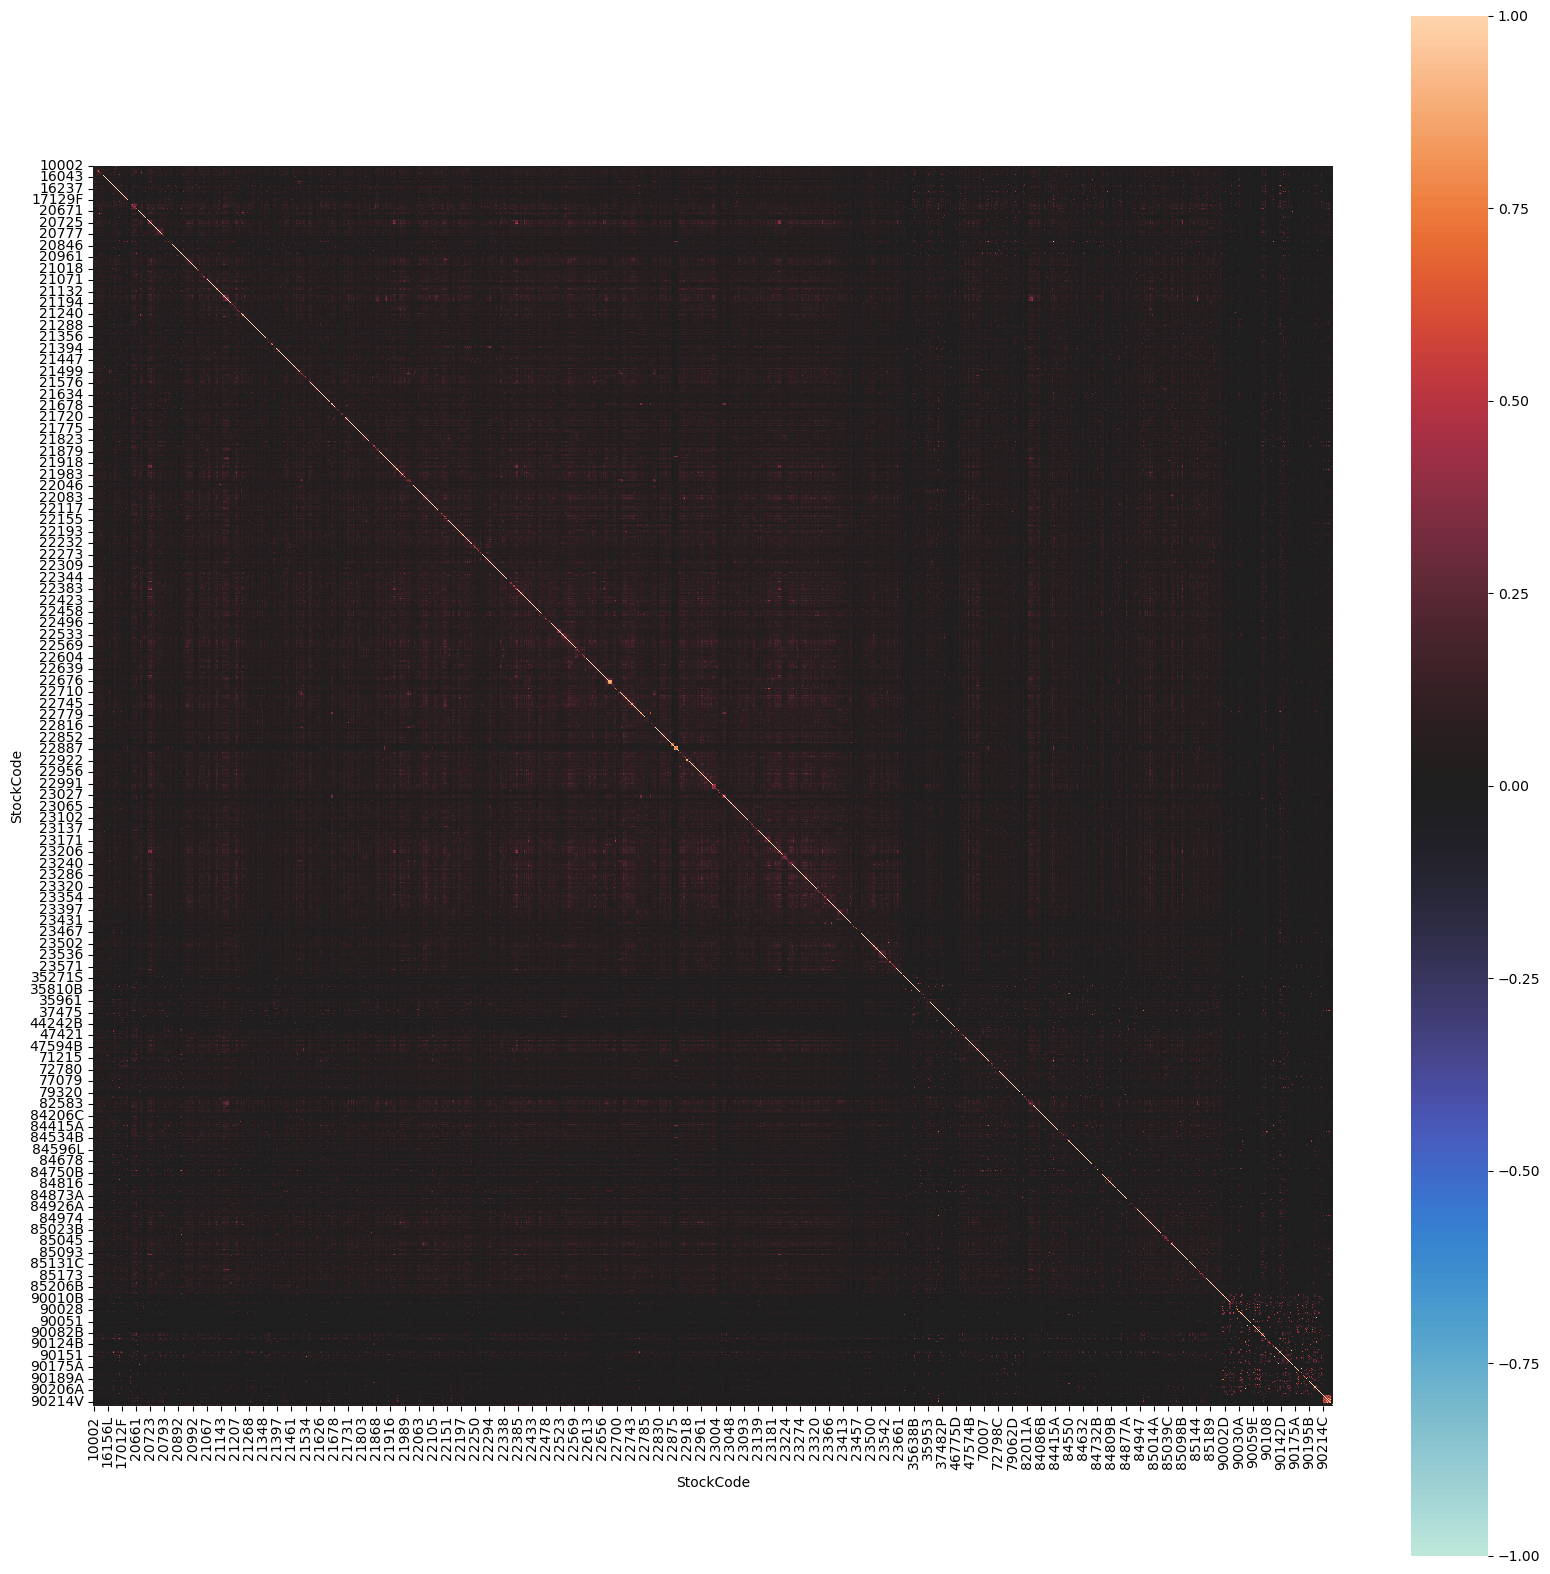

In [23]:
# Additionally, a heatmap to display the item-to-item similarity matrix.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
ax = sns.heatmap(
    item_item_similarity_matrix, 
    vmin=-1, vmax=1, center=0,
    square=True)

plt.show()

### User to User Product Recommendation System by Filtering

In [25]:
# Check dataframe information.
df1a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [26]:
# Read header of dataframe.
df1a.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [27]:
# Create CustomerID vs Item (Purchased Items, by StockCode) matrix by pivot table function.
CustomerID_Item_matrix = df1a.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [28]:
# Display the shape of matrix, 4372 rows of CustomerID, 3684 columns of Item.
CustomerID_Item_matrix.shape

(4372, 3684)

In [29]:
# Update illustration of the matrix, 1 to represent customer have purchased item, 0 to represent customer haven't purchased.
CustomerID_Item_matrix = (CustomerID_Item_matrix > 0).astype(int)

In [30]:
# Read header of CustomerID vs Item matrix.
CustomerID_Item_matrix.loc[12680:].head()

StockCode   10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
CustomerID                                                                     
12680.0         0      0      0       0       0       0      0      0      0   
12681.0         1      0      0       0       0       0      0      0      0   
12682.0         1      0      0       0       0       0      0      0      0   
12683.0         0      0      0       0       0       0      0      0      0   
12684.0         0      0      0       0       0       0      0      0      0   

StockCode   11001  ...  90214Y  90214Z  BANK CHARGES  C2  CRUK  D  DOT  M  \
CustomerID         ...                                                      
12680.0         0  ...       0       0             0   0     0  0    0  0   
12681.0         0  ...       0       0             0   0     0  0    0  0   
12682.0         0  ...       0       0             0   0     0  0    0  0   
12683.0         0  ...       0       0             0   0     0  0    0  0   
12684.0         0  ...       0       0             0   0     0  0    0  1   

StockCode   PADS  POST  
CustomerID              
12680.0        0     1  
12681.0        0     1  
12682.0        0     1  
12683.0        0     1  
12684.0        0     1  

[5 rows x 3684 columns]

In [31]:
# Create User to User similarity matrix. 
user_to_user_similarity_matrix = pd.DataFrame(
    cosine_similarity(CustomerID_Item_matrix)
)

In [32]:
# Display header of User to User similarity matrix. 
user_to_user_similarity_matrix.head()

0         1         2         3         4         5     6         7     \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   
1   0.0  1.000000  0.063022  0.046130  0.047795  0.038814   0.0  0.025876   
2   0.0  0.063022  1.000000  0.024953  0.051709  0.027995   0.0  0.027995   
3   0.0  0.046130  0.024953  1.000000  0.056773  0.138314   0.0  0.030737   
4   0.0  0.047795  0.051709  0.056773  1.000000  0.031846   0.0  0.000000   

       8         9     ...  4362  4363      4364  4365      4366      4367  \
0  0.000000  0.000000  ...   0.0   0.0  0.000000   0.0  0.000000  0.000000   
1  0.136641  0.094742  ...   0.0   0.0  0.054656   0.0  0.032844  0.062318   
2  0.118262  0.146427  ...   0.0   0.0  0.118262   0.0  0.000000  0.000000   
3  0.032461  0.144692  ...   0.0   0.0  0.000000   0.0  0.039014  0.000000   
4  0.000000  0.033315  ...   0.0   0.0  0.000000   0.0  0.000000  0.000000   

   4368      4369      4370      4371  
0   0.0  0.000000  0.000000  0.000000  
1   0.0  0.113776  0.109364  0.012828  
2   0.0  0.000000  0.170905  0.083269  
3   0.0  0.067574  0.137124  0.030475  
4   0.0  0.000000  0.044866  0.000000  

[5 rows x 4372 columns]

In [33]:
# Update index to corresponding CustomerID.
user_to_user_similarity_matrix.columns = CustomerID_Item_matrix.index
user_to_user_similarity_matrix['CustomerID'] = CustomerID_Item_matrix.index
user_to_user_similarity_matrix = user_to_user_similarity_matrix.set_index('CustomerID')

In [34]:
user_to_user_similarity_matrix.head()

CustomerID  12346.0   12347.0   12348.0   12349.0   12350.0   12352.0  \
CustomerID                                                              
12346.0         0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
12347.0         0.0  1.000000  0.063022  0.046130  0.047795  0.038814   
12348.0         0.0  0.063022  1.000000  0.024953  0.051709  0.027995   
12349.0         0.0  0.046130  0.024953  1.000000  0.056773  0.138314   
12350.0         0.0  0.047795  0.051709  0.056773  1.000000  0.031846   

CustomerID  12353.0   12354.0   12355.0   12356.0  ...  18273.0  18274.0  \
CustomerID                                         ...                     
12346.0         0.0  0.000000  0.000000  0.000000  ...      0.0      0.0   
12347.0         0.0  0.025876  0.136641  0.094742  ...      0.0      0.0   
12348.0         0.0  0.027995  0.118262  0.146427  ...      0.0      0.0   
12349.0         0.0  0.030737  0.032461  0.144692  ...      0.0      0.0   
12350.0         0.0  0.000000  0.000000  0.033315  ...      0.0      0.0   

CustomerID   18276.0  18277.0   18278.0   18280.0  18281.0   18282.0  \
CustomerID                                                             
12346.0     0.000000      0.0  0.000000  0.000000      0.0  0.000000   
12347.0     0.054656      0.0  0.032844  0.062318      0.0  0.113776   
12348.0     0.118262      0.0  0.000000  0.000000      0.0  0.000000   
12349.0     0.000000      0.0  0.039014  0.000000      0.0  0.067574   
12350.0     0.000000      0.0  0.000000  0.000000      0.0  0.000000   

CustomerID   18283.0   18287.0  
CustomerID                      
12346.0     0.000000  0.000000  
12347.0     0.109364  0.012828  
12348.0     0.170905  0.083269  
12349.0     0.137124  0.030475  
12350.0     0.044866  0.000000  

[5 rows x 4372 columns]

In [35]:
# Randomly pick CustomerID (12703) to display the most similar CustomerID.
# The most similar CustomerID is 14601, which has 51% similarity.
user_to_user_similarity_matrix.loc[12703.0].sort_values(ascending=False)

CustomerID
12703.0    1.000000
12559.0    0.292770
12648.0    0.285714
12716.0    0.281718
12623.0    0.257172
             ...   
15803.0    0.000000
13764.0    0.000000
13763.0    0.000000
15806.0    0.000000
12346.0    0.000000
Name: 12703.0, Length: 4372, dtype: float64

In [36]:
# Display CustomerID (12703) purchased items.
items_purchased_by_X = set(CustomerID_Item_matrix.loc[12703.0].iloc[
    CustomerID_Item_matrix.loc[12703.0].to_numpy().nonzero()].index)
items_purchased_by_X

{'20674',
 '20675',
 '20677',
 '21154',
 '21238',
 '21240',
 '22302',
 '22303',
 '22328',
 '22652',
 '22743',
 '22759',
 '22865',
 '22895',
 '22897',
 '22908',
 '23204',
 '23298',
 '82582',
 '84945',
 'POST'}

In [37]:
# Display CustomerID (14601) purchased items.
items_purchased_by_Y = set(CustomerID_Item_matrix.loc[14601.0].iloc[
    CustomerID_Item_matrix.loc[14601.0].to_numpy().nonzero()].index)
items_purchased_by_Y

{'21494', '22809', '72122', '72225C', '72741', '85034B', '85038'}

In [38]:
# Find out items which purchased by X (12702) but not yet purchased by Y (14601).
items_to_recommend_to_Y = items_purchased_by_X - items_purchased_by_Y

In [39]:
# Display the list of items recommended for Y (14601).
items_to_recommend_to_Y

{'20674',
 '20675',
 '20677',
 '21154',
 '21238',
 '21240',
 '22302',
 '22303',
 '22328',
 '22652',
 '22743',
 '22759',
 '22865',
 '22895',
 '22897',
 '22908',
 '23204',
 '23298',
 '82582',
 '84945',
 'POST'}

In [40]:
# Display the list of items recommended for Y (14601) with item Description.
df1a.loc[
    df1a['StockCode'].isin(items_to_recommend_to_Y), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

Description
StockCode                                     
POST                                   POSTAGE
22865                   HAND WARMER OWL DESIGN
22652                        TRAVEL SEWING KIT
22328        ROUND SNACK BOXES SET OF 4 FRUITS
22759             SET OF 3 NOTEBOOKS IN PARCEL
21154                 RED RETROSPOT OVEN GLOVE
22895      SET OF 2 TEA TOWELS APPLE AND PEARS
84945       MULTI COLOUR SILVER T-LIGHT HOLDER
22743       MAKE YOUR OWN FLOWERPOWER CARD KIT
21238                        RED RETROSPOT CUP
20674                      GREEN POLKADOT BOWL
82582                AREA PATROLLED METAL SIGN
20675                       BLUE POLKADOT BOWL
20677                       PINK POLKADOT BOWL
21240                        BLUE POLKADOT CUP
22897                  OVEN MITT APPLES DESIGN
22908            PACK OF 20 NAPKINS RED APPLES
22302                 COFFEE MUG PEARS  DESIGN
22303                 COFFEE MUG APPLES DESIGN
23204              CHARLOTTE BAG APPLES DESIGN
23298                           SPOTTY BUNTING
23298                        BUNTING , SPOTTY

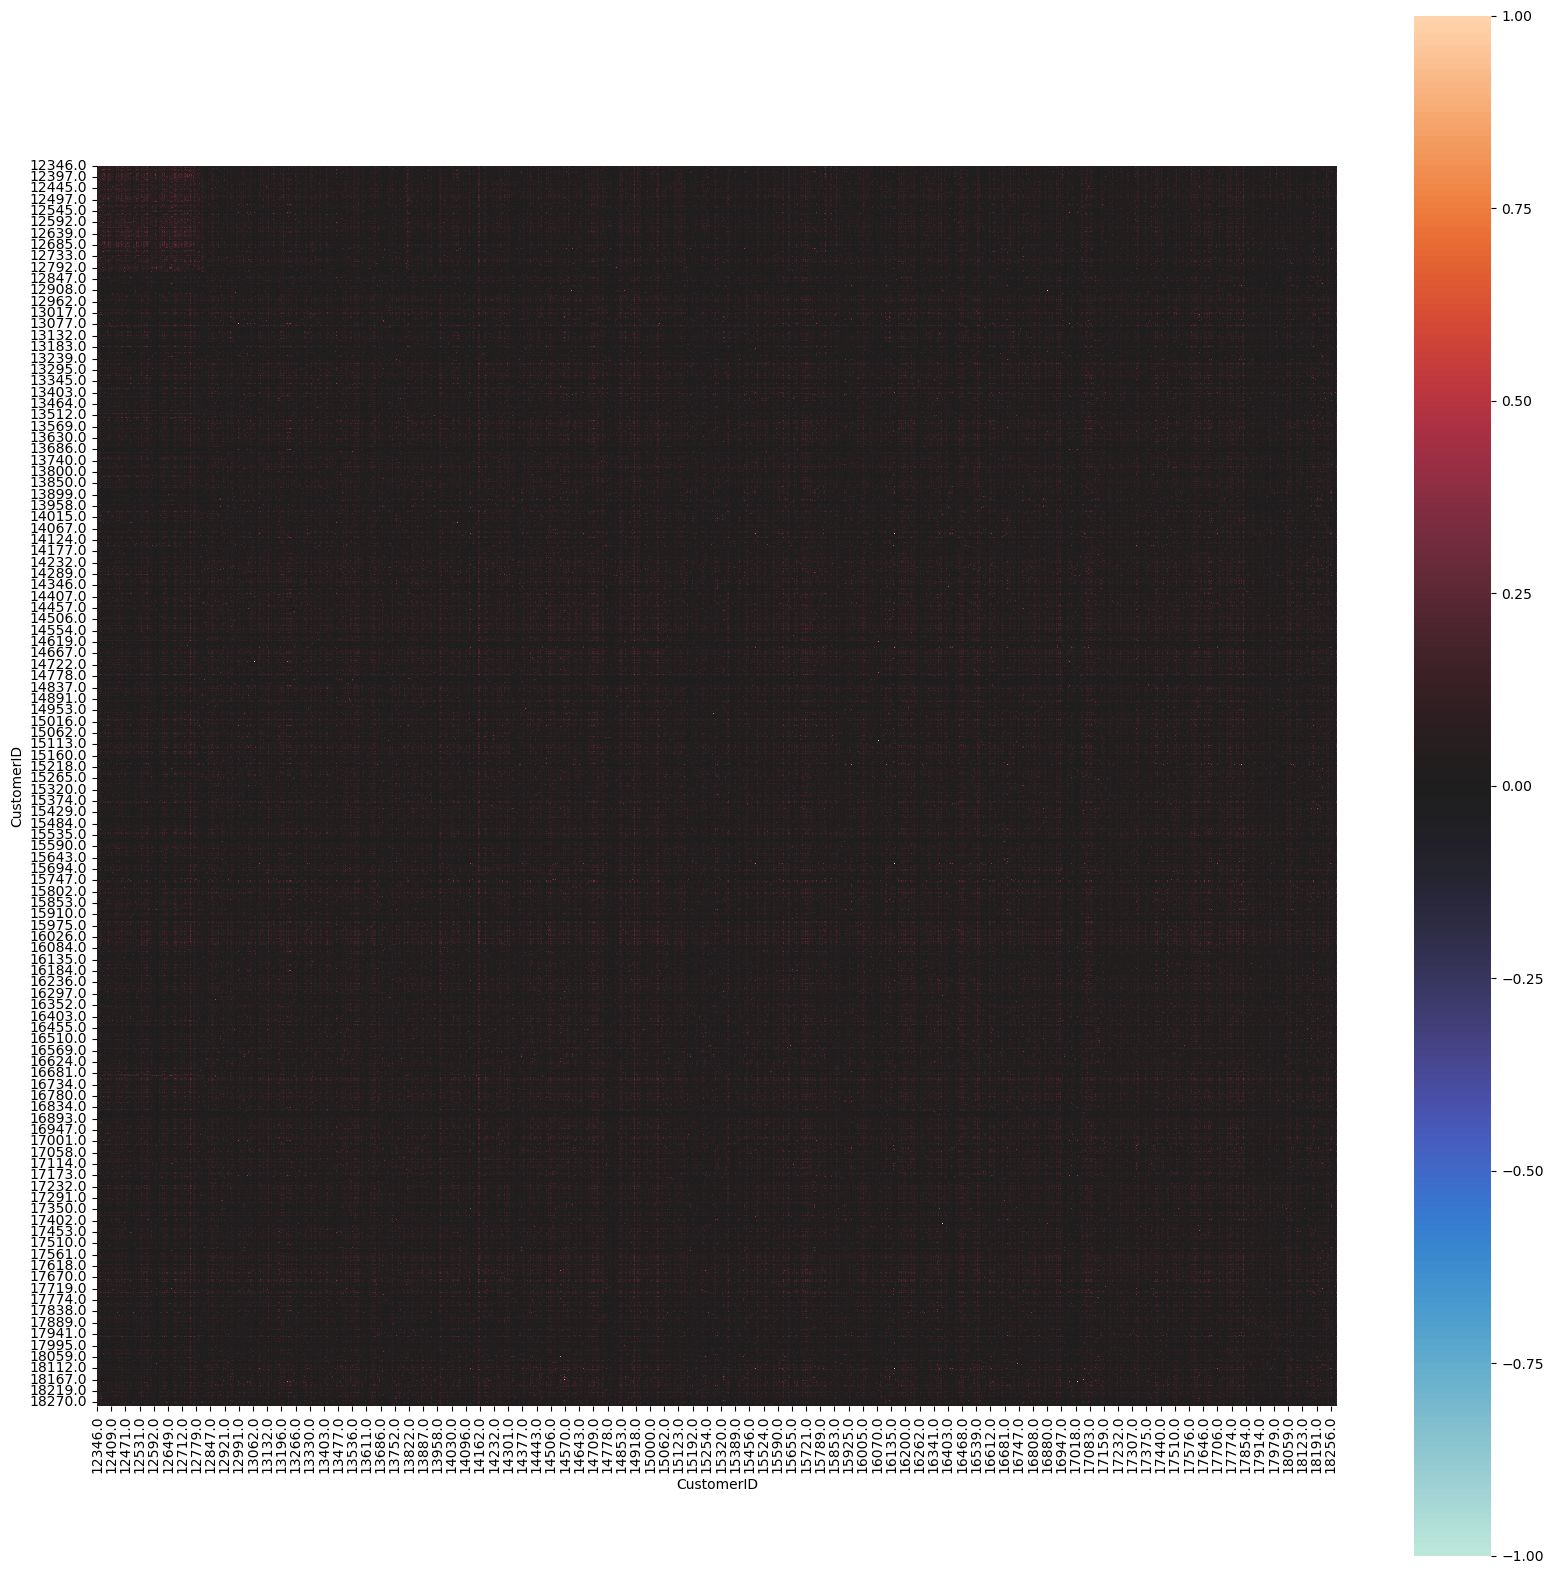

In [41]:
# Additionally, a heatmap to display the user-to-user similarity matrix.
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,20))
ax = sns.heatmap(
    user_to_user_similarity_matrix, 
    vmin=-1, vmax=1, center=0,
    square=True)

plt.show()

### Example Usage for the System

In [43]:
# Getting Similar Items for a Given Product

def get_similar_items(stock_code, top_n=10):
    """Returns the most similar items based on the item-to-item similarity matrix."""
    return list(
        item_item_similarity_matrix.loc[str(stock_code)]
        .sort_values(ascending=False)
        .iloc[1:top_n+1]
        .index
    )

In [44]:
stock_code_example = "23150"                                      # Change this to any StockCode
print(f"\n Similar items to StockCode {stock_code_example}:")
print(get_similar_items(stock_code_example))


 Similar items to StockCode 23150:
['23151', '23152', '23149', '23210', '23211', '23226', '22078', '23107', '23138', '21336']


In [45]:
# Recommending Products for a Specific User

def get_user_recommendations(customer_id):
    """Recommends products based on similar users' purchase history."""
    similar_users = (
        user_to_user_similarity_matrix.loc[customer_id]
        .sort_values(ascending=False)
        .iloc[1:6]  
        .index
    )
    
    recommended_items = set()
    for user in similar_users:
        recommended_items.update(
            CustomerID_Item_matrix.loc[user]
            .iloc[CustomerID_Item_matrix.loc[user].to_numpy().nonzero()]
            .index
        )
    
    user_purchased_items = set(
        CustomerID_Item_matrix.loc[customer_id]
        .iloc[CustomerID_Item_matrix.loc[customer_id].to_numpy().nonzero()]
        .index
    )
    
    return recommended_items - user_purchased_items

In [46]:
customer_id_example = 12703.0                                             # Change this to any CustomerID
print(f"\n Recommended products for CustomerID {customer_id_example}:")
print(get_user_recommendations(customer_id_example))


 Recommended products for CustomerID 12703.0:
{'22343', '21559', '21531', '21558', '22551', '21245', '22367', '22554', '21094', '22896', '22899', '23505', '22090', '21680', '21988', '21380', '23238', '22346', '85114C', '21056', '22556', '22962', '20712', '22131', '22659', '84692', '21246', '79191C', '22431', '21533', '22704', '21981', '22436', '22636', '21976', '20718', '21121', '21217', '22721', '23308', '21709', '22432', '20750', '22723', '21671', '22628', '22494', '21987', '47566', '21707', '22437', '23570', '20719', '22900', '21656', '21244', '22326', '22555', '22898', '21212', '22993', '21731', '23286', '21706', '20724', '22973', '21242', '23230', '47590B', '22631', '23115', '22329', '22939', '20676', '47590A', '22344', '21239', '21086', '22834', '84997D', '22923', '21207', '22610', '22301', '23580', '85099B', '22894', '21498', '23240', '22608', '20749', '21535', '84997C', '21243', '22924', '23245'}
